In [1]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=aab037924ae2ddf5418f01527f042ea2728c485bce4f757853cb0763bcf2307e
  Stored in directory: /Users/oscaraguilar/Library/Caches/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from skfuzzy.cluster import cmeans

# Reading the data 
customers = pd.read_csv('customers.csv')
customers = customers.drop(columns = 'ID', axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


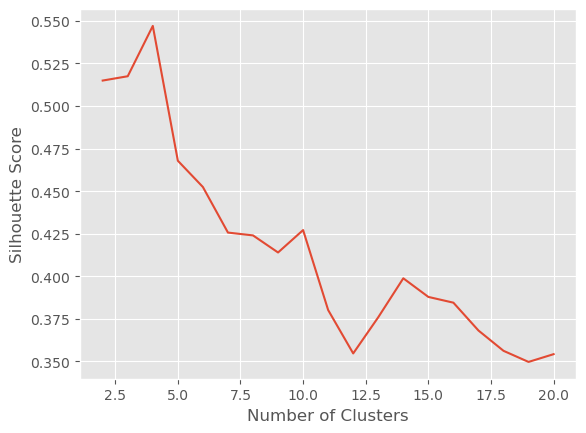

In [8]:
scaler = MinMaxScaler()
sil = list()

for i in range(2, 21):

    # Clustering the data 
    kmeans_md = Pipeline([('stand', MinMaxScaler()), 
                          ('kmeans', KMeans(n_clusters = i, n_init = 20, random_state = 1))]).fit(customers)

    # Computing the silhouette
    cluster_labels = kmeans_md['kmeans'].labels_
    sil.append(silhouette_score(scaler.fit_transform(customers), cluster_labels))

## Visualizing the results 
plt.plot([i for i in range(2, 21)], sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [10]:
X = scaler.fit_transform(customers)

## Clustering the data into 4 cluster using fuzzy clustering 
fc, W, u0, d, jm, p, pc  = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [12]:
customers['cluster'] = np.nan

## Changing likelihood to labels 
customers['cluster'] = np.where(W[0] > 0.7, 1, customers['cluster'])
customers['cluster'] = np.where(W[1] > 0.7, 2, customers['cluster'])
customers['cluster'] = np.where(W[2] > 0.7, 3, customers['cluster'])
customers['cluster'] = np.where(W[3] > 0.7, 4, customers['cluster'])

customers.head()

,Visit_Time,Average_Expense,Sex,Age,cluster
0,3,5.7,0,10,2.0
1,5,14.5,0,27,2.0
2,16,33.5,0,32,1.0
3,5,15.9,0,30,2.0
4,16,24.9,0,23,1.0


In [13]:
customers['cluster'].value_counts()

3.0    24
4.0    16
2.0    11
1.0     8
Name: cluster, dtype: int64